In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves,radviz
import math as ma
import random
from scipy.stats import norm 

C:\Users\JUHI\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#making function CDF(X) = FGS - E^(-1/2*X) (without adding noise)
def fun():
    arr=[]
    mu=75
    sigma=25/3
    lamda=0.5
    for i in range(24,0,-1):
        #i=np.random.randint(50,100)
        x=-((i-mu)**2)/(2*sigma*sigma)
        ex=ma.exp(x)
        fgs=(1/(2*ma.pi*sigma*sigma)**0.5)*ex
        ef=lamda*ma.exp(-i*lamda)
        cdf=fgs-ef
        arr.append(cdf)
    return arr        
data=fun()

In [3]:
df_m= pd.DataFrame(data,columns=['1'])
df_m.head()

,1
0,-0.000003
1,-0.000005
2,-0.000008
3,-0.000014
4,-0.000023


In [4]:
df_m.index = ['24','23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4','3','2','1']
df_m= df_m.reset_index()
df_m=df_m.rename(columns={"index": "hours"})

In [5]:
df_m

,hours,1
0,24,-0.000003
1,23,-0.000005
2,22,-0.000008
3,21,-0.000014
4,20,-0.000023
5,19,-0.000037
6,18,-0.000062
7,17,-0.000102
8,16,-0.000168
9,15,-0.000277


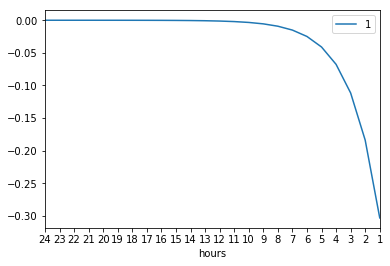

In [6]:
#plotting df against hour
df_m.plot(x='hours',y='1')
#plt.xticks(list(df.index))
plt.xticks(df_m.index, df_m['hours'])
plt.show()

In [15]:
#adding random noise to the cdf 
def fun_noise():
    arr=[]
    mu=75
    sigma=25/3
    lamda=0.5
    #f(24)=N(75, (25/3)^(/2) )
    f24=np.random.normal(75,25/3)
    fx=f24
    arr.append(fx)
    #using fx with reverse loop
    for i in range(23,0,-1):
        rn=np.random.normal(0,fx**0.25)
        ef=lamda*ma.exp(-i*lamda)  
        #F(X) = Min(FGS, FGS - E^(-1/2) - RN)
        fx=min(fx-ef,fx-ef-rn)
        arr.append(fx)
    return arr        
data=fun_noise()
#data.append(0)

In [16]:
df_m_noise= pd.DataFrame(data,columns=['1'])
df_m_noise.shape

(24, 1)

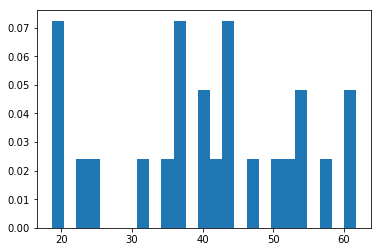

In [17]:
count, bins, ignored = plt.hist(df_m_noise.values, 25, normed=True)
plt.show()

In [18]:
#df_m_noise['1']=df_m_noise['1'].astype(int)
#df_m_noise = df_m_noise.reset_index(drop=True)
df_m_noise.index = ['24','23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4','3','2','1']
df_m_noise= df_m_noise.reset_index()
df_m_noise=df_m_noise.rename(columns={"index": "hours"})

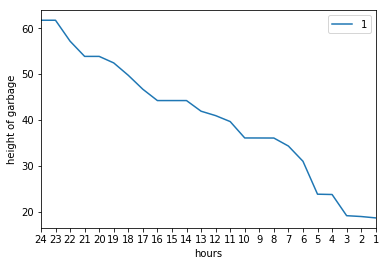

In [19]:
#plotting graph with x axis as hours and y axis as height of filled garbage in dustbin
ax=df_m_noise.plot(x='hours',y='1')
plt.xticks(df_m_noise.index, df_m_noise['hours'])
ax.set_ylabel("height of garbage")
ax.set_xlabel("hours")
plt.show()

In [12]:
df_m_noise

,hours,1
0,24,76.035007
1,23,71.977790
2,22,71.977790
3,21,70.646170
4,20,70.646170
5,19,66.326343
6,18,65.949109
7,17,65.949109
8,16,65.949109
9,15,65.949109


In [13]:
#df = pd.DataFrame(np.random.normal(75,25/3,size=(24,1))-np.random.exponential(2,size=(24,1)), columns=['1'])


In [14]:
#count, bins, ignored = plt.hist(df.values, 25, normed=True)
#plt.show()